In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # Added missing import
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder  # For handling categorical variables
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Added performance metrics


In [12]:
# Loading the data
df = pd.read_csv('cleaned_data.csv')

In [13]:
# Convert categorical variables to numerical values (if needed)
categorical_columns = df.select_dtypes(include=['object']).columns  # Find categorical columns


In [14]:
# Encoding categorical features using Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders in case we need to inverse transform later

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.2, random_state=42)


In [22]:
from sklearn.impute import SimpleImputer

# Check for missing values
print("Missing values before imputation:")
print(X_train.isnull().sum())

# Use SimpleImputer to replace missing values
imputer = SimpleImputer(strategy='most_frequent')  # Options: 'mean', 'median', 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert back to DataFrame (optional, but good practice)
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Check if missing values are handled
print("Missing values after imputation:")
print(X_train.isnull().sum())



Missing values before imputation:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
year              0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64
Missing values after imputation:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
year              0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64


In [18]:
# training the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
# Predict and evaluate
y_pred = lr.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Computing performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Displaying Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9165
Precision: 0.6550
Recall: 0.3894
F1 Score: 0.4884
Confusion Matrix:
[[6971  167]
 [ 497  317]]


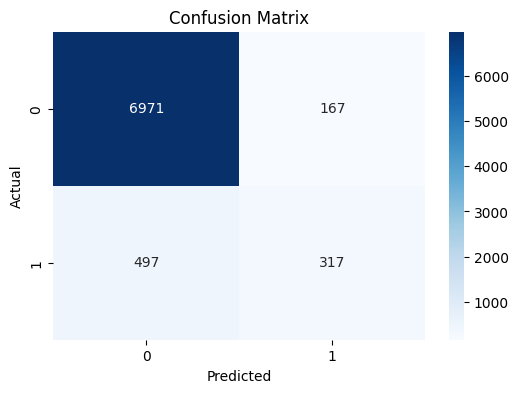

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()